<a href="https://www.kaggle.com/code/serdargundogdu/rfm-analysis-customer-segmentation?scriptVersionId=109443797" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/data20k/data_20k.csv


# **Business Problem**

An online shoe selling company willing to set marketing strategies on customer segments which they want to make segmentation. Intended for this, Customer behaviours will be determined and customers will be groupbed by using this aggregated behaviours.

# **Story of Dataset**

This dataset has been taken from a shoe selling company. This dataset consists of last orders between 2020 to 2021 years and Customers', who purchased from omnichannel(either of online and offline),historical behaviours data.

**12 variables, 19.945 observation, 2.7 MB**

## **Variables**

**master_id:** Unique customer id

**order_channel:** Purchasing platform channel (Android, ios, desktop, mobile)

**last_order_channel:** Last order channel

**first_order_date:** Customer's first order date

**last_order_date:** Customer's last order date

**last_order_date_online:** Customer's first online order date

**last_order_date_offline:** Customer's first offline order date

**order_num_total_ever_online:** Customer's total online order amount

**order_num_total_ever_offnline:** Customer's total offnline order amount

**interested_in_categories_12** Customer's order categories list in last 12 months

# **Data Understanding and Preperation**

## **Step 1. Reading CSV file and Copying Dataframe**

In [2]:
import datetime as dt
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 80)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

df_ = pd.read_csv("../input/data20k/data_20k.csv")
df = df_.copy()

## **Step 2. In Dataset**

### **Step 2.a. First 10 Observation**

In [3]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.000,2.000,150.870,49.990,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.000,1.000,59.990,315.940,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.000,1.000,49.990,113.640,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.000,2.000,120.480,934.210,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.000,1.000,69.980,95.980,"[KADIN, AKTIFSPOR]"


### **Step 2.b. Variable Names**

In [4]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline', 'order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_offline', 'customer_value_total_ever_online', 'interested_in_categories_12'], dtype='object')

### **Step 2.c. Descriptive Statistics**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.000,3.111,4.226,1.000,1.000,2.000,4.000,200.000
order_num_total_ever_offline,19945.000,1.914,2.063,1.000,1.000,1.000,2.000,109.000
customer_value_total_ever_offline,19945.000,253.923,301.533,10.000,99.990,179.980,319.970,18119.140
customer_value_total_ever_online,19945.000,497.322,832.602,12.990,149.980,286.460,578.440,45220.130


### **Step 2.d. Null Values**

In [6]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

### **Step 2.e. Variable Types and Reviews**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

## **Step 3. New Variables for Omnichannel Total Order and Value (Omnichannel is total orders of online and offline customers.)**

In [8]:
df["order_num_total_ever_omnichannel"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"] 
df["customer_value_total_ever_omnichannel"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"] 

## **Step 4. Variable Types Review. Change Variable Names that Contains "date" into Date Type**

In [9]:
df.info()
df_date_cols = df.columns[df.columns.str.contains("date")]
df[df_date_cols] = df[df_date_cols].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   master_id                              19945 non-null  object 
 1   order_channel                          19945 non-null  object 
 2   last_order_channel                     19945 non-null  object 
 3   first_order_date                       19945 non-null  object 
 4   last_order_date                        19945 non-null  object 
 5   last_order_date_online                 19945 non-null  object 
 6   last_order_date_offline                19945 non-null  object 
 7   order_num_total_ever_online            19945 non-null  float64
 8   order_num_total_ever_offline           19945 non-null  float64
 9   customer_value_total_ever_offline      19945 non-null  float64
 10  customer_value_total_ever_online       19945 non-null  float64
 11  in

## **Step 5. Customer Counts, Total Orders, Total Order Values Distribution Grouped by Channels**

In [10]:
df.groupby("order_channel").agg({"master_id":"count",
                                 "order_num_total_ever_omnichannel":"sum",
                                 "customer_value_total_ever_omnichannel":"sum"})

,master_id,order_num_total_ever_omnichannel,customer_value_total_ever_omnichannel
order_channel,,,
Android App,9495,52269.000,7819062.760
Desktop,2735,10920.000,1610321.460
Ios App,2833,15351.000,2525999.930
Mobile,4882,21679.000,3028183.160


## **Step 6. The First 10 Most Value Added Customers**

In [11]:
df.sort_values("customer_value_total_ever_omnichannel", ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total_ever_omnichannel,customer_value_total_ever_omnichannel
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.000,45905.100
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.000,1.000,130.490,36687.800,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.000,36818.290
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.000,33918.100
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.000,1.000,538.940,30688.470,"[ERKEK, KADIN, AKTIFSPOR]",11.000,31227.410
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.000,3.000,18119.140,2587.200,[AKTIFSPOR],4.000,20706.340
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",70.000,18443.570
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.000,16918.570
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.000,1.000,180.730,12545.370,"[ERKEK, AKTIFSPOR]",37.000,12726.100
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.000,12282.240
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.000,2.000,64.970,12038.180,"[ERKEK, KADIN]",20.000,12103.150


## **Step 7. The First 10 Most Order Ever Customers**

In [12]:
df.sort_values("order_num_total_ever_omnichannel", ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total_ever_omnichannel,customer_value_total_ever_omnichannel
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.000,45905.100
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.000,12282.240
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.000,109.000,10239.460,143.980,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.000,10383.440
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.000,87.000,8432.250,139.980,[ERKEK],88.000,8572.230
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.000,81.000,3997.550,242.810,[ERKEK],83.000,4240.360
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.000,33918.100
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.000,74.000,4640.770,543.280,"[KADIN, AKTIFSPOR]",77.000,5184.050
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.000,3.000,292.930,5004.950,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.000,5297.880
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.000,16918.570
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",70.000,18443.570


## **Step 8. Defining Function for Data Preperation Phase**

In [13]:
def prepare_df(df):
    df["order_num_total_ever_omnichannel"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"] 
    df["customer_value_total_ever_omnichannel"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]
    df_date_cols = df.columns[df.columns.str.contains("date")]
    df[df_date_cols] = df[df_date_cols].astype('datetime64[ns]')
    prepared_df = df[["master_id", "last_order_date", "order_num_total_ever_omnichannel", "customer_value_total_ever_omnichannel"]]
    return prepared_df

# **RFM (Recency, Frequency, Monetary) Metrics Calculations**

## **Step 1. Recency, Frequency and Monetary Definitions**

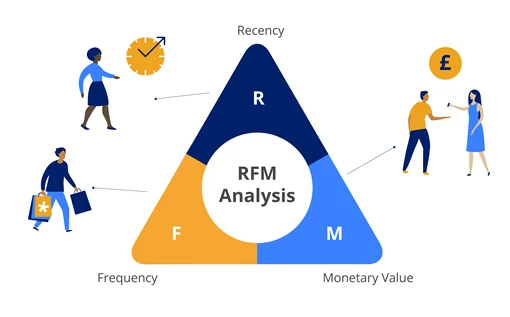

RFM is a key indicator of a customers current relationship with you. RFM allows you to assign a score to every record in your customer.

https://hivemarketingcloud.com/articles/what-is-rfm-analysis

**Recency:** How recently a customer has made a purchase

**Frequency:** How often a customer makes a purchase.

**Monetary Value:** How much money a customer spends on purchases.

## **Step 2. Calculation of Recency, Frequency and Monetary Metrics for Each Customer**

In [14]:
prepared_df = prepare_df(df)
prepared_df["last_order_date"].max()
today_date = dt.datetime(2021, 6, 2)
prepared_df["recency"] = (today_date - prepared_df["last_order_date"]).astype("timedelta64[D]")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Even though a warning, It works fine.

## **Step 3. Assigning of Recency, Frequency and Monetary Metrics to "rfm" named variable**

In [15]:
rfm = prepared_df[["master_id", 
                  "recency", 
                  "order_num_total_ever_omnichannel", 
                  "customer_value_total_ever_omnichannel"]]

## **Step 4. Naming of Recency, Frequency and Monetary Metrics as "recency", "frequency" and "monetary Respectively**

In [16]:
rfm.columns = ["master_id", "recency", "frequency", "monetary"]

In [17]:
rfm

,master_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,96.000,5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,106.000,21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,187.000,5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,136.000,2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,87.000,2.000,209.980
...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,332.000,3.000,401.960
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,162.000,2.000,390.470
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,9.000,3.000,632.940
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,109.000,6.000,1009.770


# **RFM (Recency, Frequency, Monetary) Score Calculations**

## **Step 1. Changing into Scores between 1 to 5 for Recency, Frequency and Monetary Metrics by using qcut function**

In [18]:
pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

0        4
1        5
2        3
3        1
4        1
        ..
19940    2
19941    2
19942    3
19943    4
19944    1
Name: monetary, Length: 19945, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

## **Step 2. Saving Recency, Frequency and Monetary Scores As "recency_score", frequency_score" and "monetary_score" Respectively**

In [19]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [20]:
rfm

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,96.000,5.000,939.370,3,4,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,106.000,21.000,2013.550,3,5,5
2,69b69676-1a40-11ea-941b-000d3a38a36f,187.000,5.000,585.320,2,4,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,136.000,2.000,121.970,3,1,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,87.000,2.000,209.980,3,1,1
...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,332.000,3.000,401.960,1,3,2
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,162.000,2.000,390.470,2,2,2
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,9.000,3.000,632.940,5,3,3
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,109.000,6.000,1009.770,3,4,4


## **Step 3. Assigning New "RF_SCORE" Variable from "recency_score" and "frequency_score"**

In [21]:
rfm["RF_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))

In [22]:
rfm

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,96.000,5.000,939.370,3,4,4,34
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,106.000,21.000,2013.550,3,5,5,35
2,69b69676-1a40-11ea-941b-000d3a38a36f,187.000,5.000,585.320,2,4,3,24
3,1854e56c-491f-11eb-806e-000d3a38a36f,136.000,2.000,121.970,3,1,1,31
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,87.000,2.000,209.980,3,1,1,31
...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,332.000,3.000,401.960,1,3,2,13
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,162.000,2.000,390.470,2,2,2,22
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,9.000,3.000,632.940,5,3,3,53
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,109.000,6.000,1009.770,3,4,4,34


# **RF (Recency, Frequency) Score Definition As Segment**

## **Step 1. Segment Definitions from RF Scores**

In [23]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

## **Step 2. Mapping Scores into "seg_map" definitions**

In [24]:
rfm['RF_SCORE'].replace(seg_map, regex=True, inplace=True)

In [25]:
rfm

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,96.000,5.000,939.370,3,4,4,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,106.000,21.000,2013.550,3,5,5,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,187.000,5.000,585.320,2,4,3,at_Risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,136.000,2.000,121.970,3,1,1,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,87.000,2.000,209.980,3,1,1,about_to_sleep
...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,332.000,3.000,401.960,1,3,2,at_Risk
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,162.000,2.000,390.470,2,2,2,hibernating
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,9.000,3.000,632.940,5,3,3,potential_loyalists
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,109.000,6.000,1009.770,3,4,4,loyal_customers


# **Action Time**

## **Step 1. Reviewing of Recency, Frequency and Monetary Means**

In [26]:
rfm.groupby("RF_SCORE").agg(["mean"])

,recency,frequency,monetary
,mean,mean,mean
RF_SCORE,,,
about_to_sleep,114.785,2.401,359.009
at_Risk,242.607,4.472,646.610
cant_loose,236.444,10.698,1474.468
champions,18.107,8.934,1406.625
hibernating,248.950,2.394,366.267
loyal_customers,83.595,8.375,1216.819
need_attention,114.829,3.728,562.143
new_customers,18.918,2.000,339.956


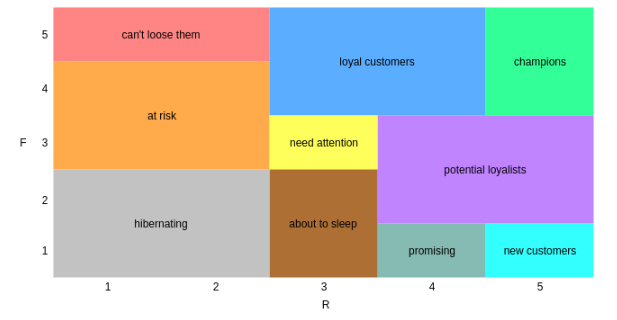

https://enhencer.com/articles/advantages-and-inefficacies-of-rfm-segmentation/


## **Step 2. By Using RFM Analysis, Finding Regarding Customers and Sending master_id's of Customers list as a CSV Data File**

### **Step 2.a. Consider that a new woman shoe brand was added. This new brand is a prime. Special communications will be done for this prime customers. Loyal Customers ("champions",  "loyal_customers") and focus order group contains "KADIN" category in "interested_in_categories_12". Saving CSV Data file which includes master_id of these specified customers.**

In [27]:
new_df = pd.DataFrame()

series_females = df[df["interested_in_categories_12"].str.contains("KADIN")]["master_id"]
series_loyals = rfm[(rfm["RF_SCORE"] == "champions") | (rfm["RF_SCORE"] == "loyal_customers")]["master_id"]
loyal_female_index = series_females.index.union(series_loyals.index)
new_df["master_id"] = df.iloc[loyal_female_index, 0]
new_df.to_csv("./loyal_female_customers.csv")

In [28]:
new_df

,master_id
0,cc294636-19f0-11eb-8d74-000d3a38a36f
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
2,69b69676-1a40-11ea-941b-000d3a38a36f
5,e585280e-aae1-11e9-a2fc-000d3a38a36f
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f
...,...
19932,13a5e98c-a824-11e9-a2fc-000d3a38a36f
19934,9777eb76-bed4-11ea-958c-000d3a38a36f
19937,515ca2d8-afdc-11e9-9757-000d3a38a36f
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f


### **Step 2.b. Consider that 40% discount of Male Kid Customer Shoes is being planned . Regarding old but good "cant_loose", "hibernating","new customers" categories have been chosen. Saving CSV Data file which includes master_id of these specified customers.**

In [29]:
new_df2 = pd.DataFrame()

series_male_kid = df[df["interested_in_categories_12"].str.contains("ERKEK", "COCUK")]["master_id"]
series_hib_new_cant = rfm[(rfm["RF_SCORE"] == "hibernating") | (rfm["RF_SCORE"] == "new_customers") | (rfm["RF_SCORE"] == "cant_loose")]["master_id"]
h_n_c_index = series_male_kid.index.union(series_hib_new_cant.index)
new_df2["master_id"] = df.iloc[h_n_c_index, 0]
new_df2.to_csv("./h_n_c_customers.csv")

In [30]:
new_df2

,master_id
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
2,69b69676-1a40-11ea-941b-000d3a38a36f
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f
9,1143f032-440d-11ea-8b43-000d3a38a36f
...,...
19938,2427ef66-a410-11e9-a2fc-000d3a38a36f
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f
